In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


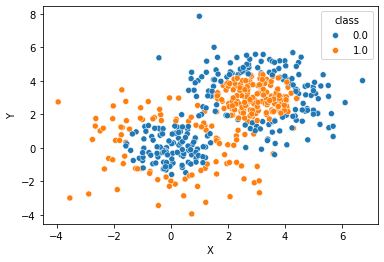

In [3]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

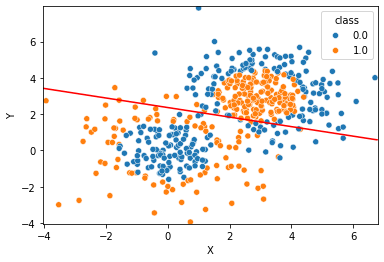

In [4]:
from sklearn.linear_model import LogisticRegression

### Your code is here

X = circ.drop('class', axis=1)
y = circ['class']

model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

grid_step=.01

x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
np.arange(y_min, y_max, grid_step))

# каждой точке в сетке [x_min, m_max]x[y_min, y_max]
# ставим в соответствие свой цвет
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);
plt.contour(xx, yy, Z, levels=[0.5], colors='red'); 


In [5]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y, y_pred))

0.424


**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [6]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here

for k in all_k:
    print(f'K = {k}')
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)

    train_acc = accuracy_score(y_train, pred_train)
    test_acc = accuracy_score(y_test, pred_test)

    print(f'Train score: {train_acc}')
    print(f'Test score: {test_acc}')
    print('----------------------------')


K = 1
Train score: 1.0
Test score: 0.89
----------------------------
K = 3
Train score: 0.9475
Test score: 0.87
----------------------------
K = 10
Train score: 0.915
Test score: 0.85
----------------------------
K = 30
Train score: 0.8525
Test score: 0.74
----------------------------
K = 40
Train score: 0.8
Test score: 0.75
----------------------------
K = 60
Train score: 0.6925
Test score: 0.73
----------------------------


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [10]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
### Your code is here

param_grid = {'KNN__n_neighbors': [1, 5, 10]}

knn = KNeighborsClassifier()

search = GridSearchCV(knn, param_grid, cv=5)

search.fit(X_train, y_train)
y_pred = search.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.4703603843086621


In [14]:
search.best_params_

{'n_neighbors': 10}

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [18]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier())])
param_grid = {'KNN__n_neighbors': [1, 5, 10]}
search_norm = GridSearchCV(pipe, param_grid, cv=5)

search_norm.fit(X_train, y_train)
y_pred = search_norm.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(search_norm.best_params_)

0.6607678578209851
{'KNN__n_neighbors': 10}


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [20]:
### Your code is here

pipe_1 = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=10, p=1))])

pipe_1.fit(X_train, y_train)
y_pred = pipe_1.predict(X_test)

print(f"Pipe 1: {accuracy_score(y_test, y_pred)}")

pipe_2 = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=10, p=2))])

pipe_2.fit(X_train, y_train)
y_pred = pipe_2.predict(X_test)

print(f"Pipe 2: {accuracy_score(y_test, y_pred)}")



Pipe 1: 0.6611476094634109
Pipe 2: 0.6607678578209851


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [21]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


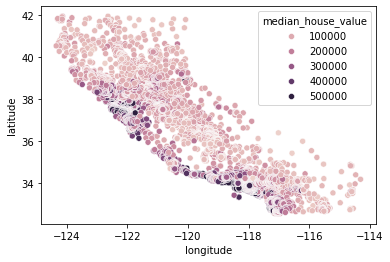

In [23]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x='longitude', y='latitude', data=X, hue=y);

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(mean_squared_error(y_test, y_pred)**0.5)

98369.87709657698


In [34]:
params = {'knn__n_neighbors': list(range(1, 10))}
pipe_1 = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

grid = GridSearchCV(pipe_1, params)
grid.fit(X, y)

y_pred = grid.predict(X_test)

print(mean_squared_error(y_test, y_pred)**0.5)

46135.17952327734


In [35]:
grid.best_params_

{'knn__n_neighbors': 9}

In [46]:
def kernel(distances, h=0.1):
    const = 1 / (np.sqrt(2 * np.pi))
    power = (-1/2) * ((distances)**2) / h**2
    return const * np.exp(power)

In [31]:
from sklearn.neighbors import KernelDensity

In [33]:
# params = {'knn__n_neighbors': list(range(1, 10)), 'knn__': list(np.arange(0.02, 0.1, 0.01))}
params = {'kde__bandwidth': list(np.arange(0.02, 0.1, 0.01))}
pipe_2 = Pipeline([('scaler', StandardScaler()), ('kde', KernelDensity())])

grid = GridSearchCV(pipe_2, params)
grid.fit(X, y)

grid.best_params_
# y_pred = grid.predict(X_test)

# print(mean_squared_error(y_test, y_pred)**0.5)

{'kde__bandwidth': 0.09}

In [47]:
pipe_3 = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=9, weights=kernel))])

pipe_3.fit(X_train, y_train)

y_pred = pipe_3.predict(X_test)

print(mean_squared_error(y_test, y_pred)**0.5)

53029.17371967094
